In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
import time
import xgboost as XGBClassifier

In [ ]:
data = pd.read_csv('mushrooms.csv')
data.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
data.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [ ]:
data.shape

(8124, 23)

**Visualisation**

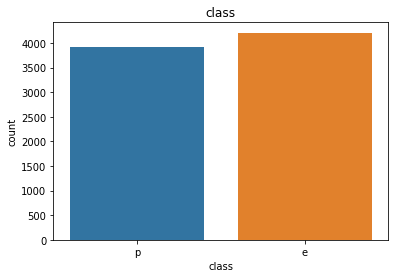

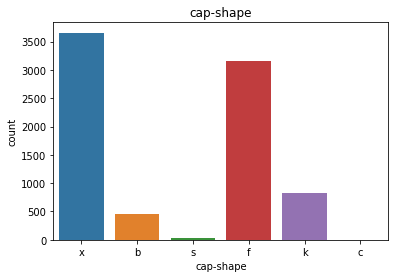

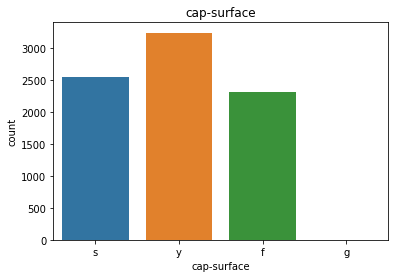

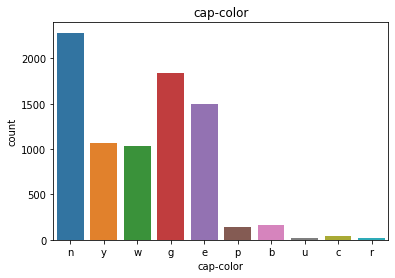

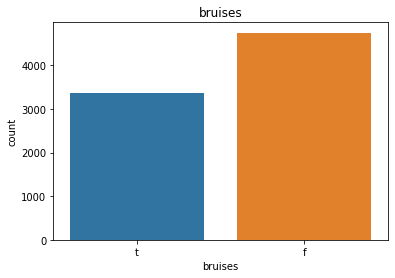

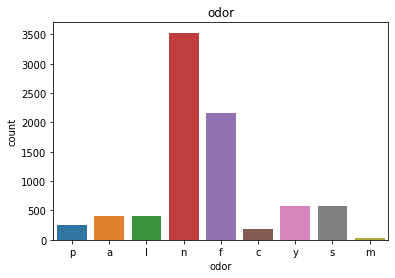

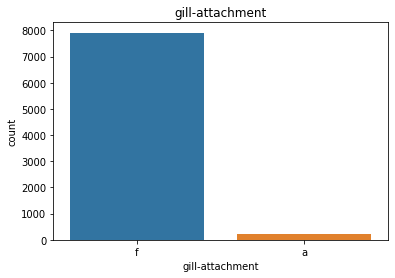

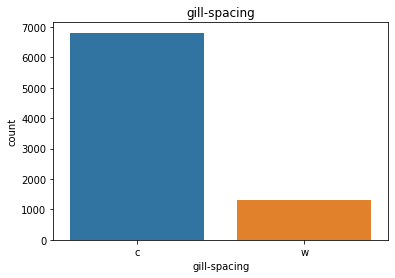

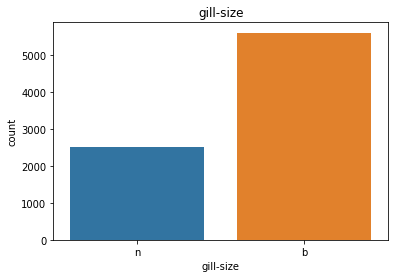

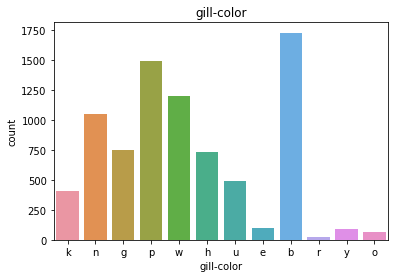

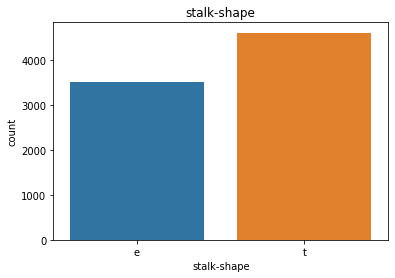

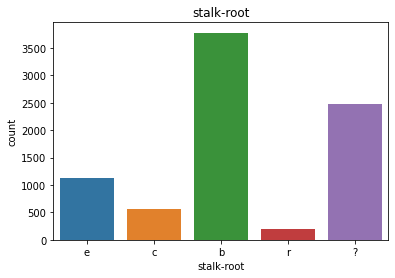

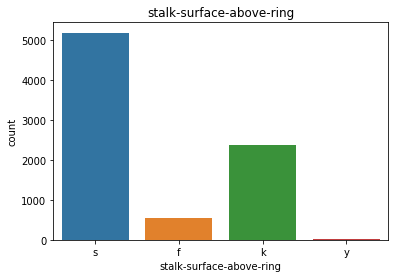

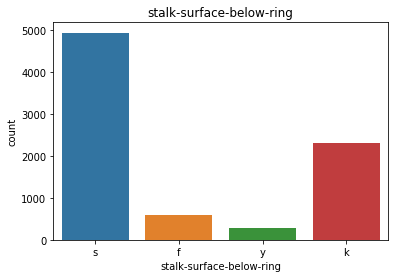

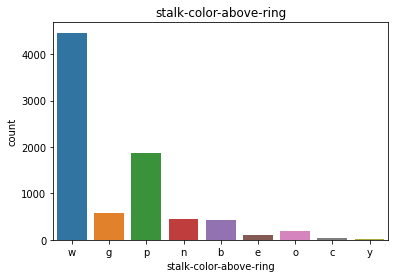

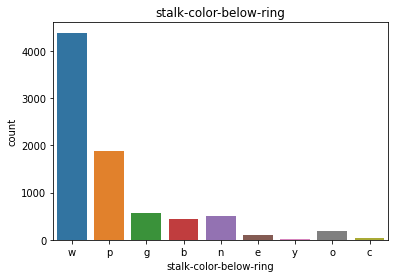

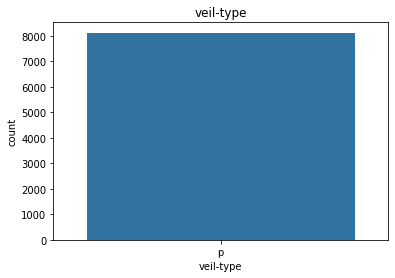

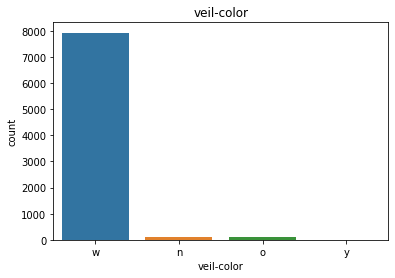

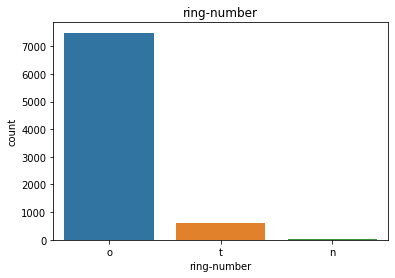

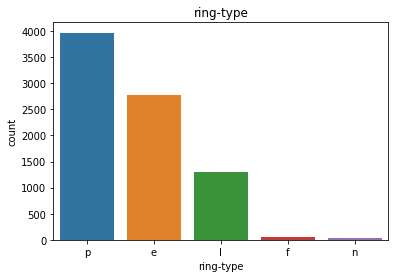

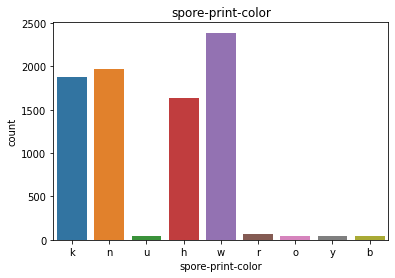

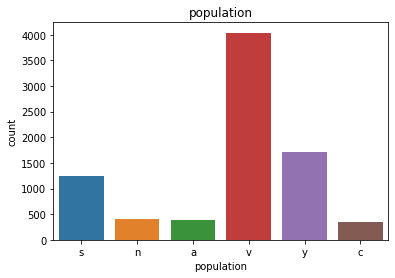

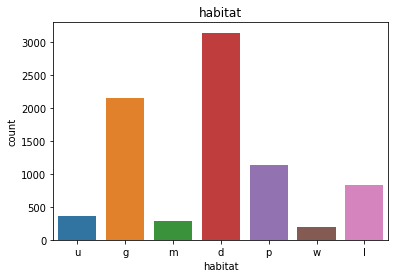

In [ ]:
# count plots for each and every column

cols = data.columns

for col in cols:
  plt.figure()
  sns.countplot(x=data[col])
  plt.title(col)
  plt.show()


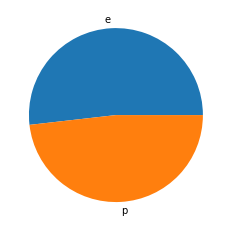

In [ ]:
count = data['class'].value_counts( )

plt2 = plt.pie(count, labels = count.index)

**preprocessing**

In [ ]:
# checking for unusual or unexpected values in object type columns

for col in data.select_dtypes(include=['object']).columns:
  unique_values = data[col].unique()
  print(f'Column {col} has unique values: {unique_values}')

Column class has unique values: ['p' 'e']
Column cap-shape has unique values: ['x' 'b' 's' 'f' 'k' 'c']
Column cap-surface has unique values: ['s' 'y' 'f' 'g']
Column cap-color has unique values: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
Column bruises has unique values: ['t' 'f']
Column odor has unique values: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
Column gill-attachment has unique values: ['f' 'a']
Column gill-spacing has unique values: ['c' 'w']
Column gill-size has unique values: ['n' 'b']
Column gill-color has unique values: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
Column stalk-shape has unique values: ['e' 't']
Column stalk-root has unique values: ['e' 'c' 'b' 'r' '?']
Column stalk-surface-above-ring has unique values: ['s' 'f' 'k' 'y']
Column stalk-surface-below-ring has unique values: ['s' 'f' 'y' 'k']
Column stalk-color-above-ring has unique values: ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
Column stalk-color-below-ring has unique values: ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' '

In [ ]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [ ]:
data.drop(['veil-type'],axis =1,inplace = True)


In [ ]:
data.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


In [ ]:
le = LabelEncoder()

data = data.apply(le.fit_transform) # labelencoding for all columns

In [ ]:
data.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


**Model Building**

In [ ]:
# defining X and y & split the dataset

X = data.drop(columns=['class'])

y = data['class']

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size= 0.2,random_state = 42)


In [ ]:
start_time = time.time()

In [ ]:
model = DecisionTreeClassifier(criterion = 'gini',max_depth = 5)

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
end_time = time.time()

execution_time = end_time - start_time

print(f"Execution time: {execution_time:.2f} seconds ")

Execution time: 0.13 seconds 


In [ ]:
y_pred_train = model.predict(X_train)
y_pred_train

array([1, 1, 1, ..., 0, 1, 0])

In [ ]:
y_pred_test = model.predict(X_test)
y_pred_test

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
def evaluate_model(act, pred):
  from sklearn.metrics import confusion_matrix, accuracy_score,\
  recall_score, precision_score

  print("Confusion Matrix \n", confusion_matrix(act, pred))
  print("Accuracy :", accuracy_score(act, pred))
  print("Recall :", recall_score(act, pred))
  print("Precision :", precision_score(act, pred))

In [ ]:
print("Train")
evaluate_model(y_train, y_pred_train)
print("Test")
evaluate_model(y_test, y_pred_test)

Train
Confusion Matrix 
 [[3274   91]
 [  39 3095]]
Accuracy : 0.9799969226034775
Recall : 0.9875558391831525
Precision : 0.9714375392341494
Test
Confusion Matrix 
 [[814  29]
 [  9 773]]
Accuracy : 0.9766153846153847
Recall : 0.9884910485933504
Precision : 0.9638403990024937


In [ ]:
prediction_file = pd.DataFrame({'test':y_pred_test})

In [ ]:
prediction_file.to_csv('predicted_results_as_poiseness_or_edible.csv',index=False)